# Центральная предельная теорема своими руками

In [43]:
import pandas as pd # Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [44]:
x = np.linspace(0.01,10,1000) #Создаем массив равномерно распределенных чисел
c = 0.9
sample = sts.weibull_min.rvs(c, size=1000) # Генерируем значения, распределенные согласно распределению Вейбулла при с=0.9

## Функция распределения

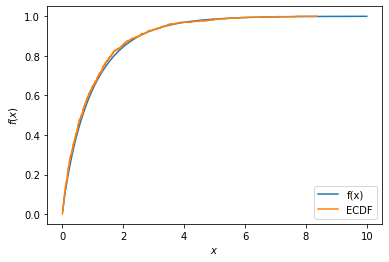

In [45]:
plt.plot(x, sts.weibull_min.cdf(x, c), label='f(x)') # Строим теоретическую фунцкию распределения f(x)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


from statsmodels.distributions.empirical_distribution import ECDF # Проводим сравнение с эмпирической функцией распределения 
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')
plt.legend(loc='lower right')
plt.show()

## Плотность вероятности

Mean of the distribution: 1.0521837208912934
Variance of the distribution: 1.3715033946587971


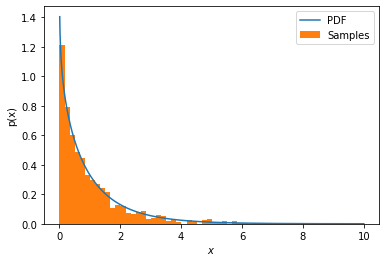

In [46]:
print('Mean of the distribution:', sts.weibull_min.mean(c))   #Выводим на экран среднее значение и дисперсию распределения
print('Variance of the distribution:', sts.weibull_min.var(c))

plt.plot(x, sts.weibull_min.pdf(x, c), label='PDF')

# Строим нормированную гистограмму полученных значений и функцию распределения вероятности поверх нее

plt.hist(sample, bins=50, density=True, label='Samples') 
plt.ylabel('p(x)')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.show()

## Применение ЦПТ

### Размер выборки - 5 значений

In [47]:
mean=[]

# Создаем тысячу выборок значений распределения Вейбулла размером в 5 чисел.  
# Записываем средние значения получившихся выборок в пустой список
for i in range(1000):
    t = sts.weibull_min.rvs(c, size=5)
    mean.append(t.mean())

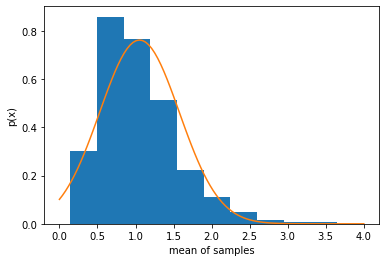

In [48]:
# Строим нормированную гистограмму получившихся средних значений выборок
# Сравниваем с нормальным распределением, имеющим следующие параметры:
mu = sts.weibull_min.mean(c) # Матожидание принимает среднее значение распределения Вейбулла
sigma = (sts.weibull_min.var(c)/5)**0.5 # СКО - Корень из дисперсии распределения Вейбулла, деленной на размер выборки

norm_rv = sts.norm(loc=mu, scale=sigma)

plt.hist(mean, density=True)
plt.ylabel('p(x)')
plt.xlabel('mean of samples')

x1 = np.linspace(0,4,100)
pdf1 = norm_rv.pdf(x1)
plt.plot(x1, pdf1)
plt.show()

### Размер выборки - 10 значений

In [49]:
mean=[]

for i in range(1000):
    t = sts.weibull_min.rvs(c, size=10)
    mean.append(t.mean())

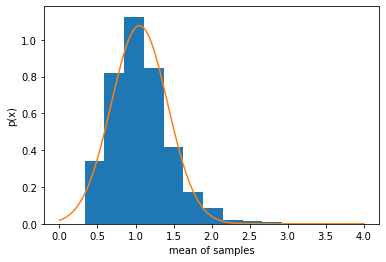

In [50]:
mu = sts.weibull_min.mean(c)
sigma = (sts.weibull_min.var(c)/10)**0.5

norm_rv = sts.norm(loc=mu, scale=sigma)

plt.hist(mean, density=True)
plt.ylabel('p(x)')
plt.xlabel('mean of samples')

x1 = np.linspace(0,4,100)
pdf1 = norm_rv.pdf(x1)
plt.plot(x1, pdf1)
plt.show()

### Размер выборки - 50 значений

In [51]:
mean=[]

for i in range(1000):
    t = sts.weibull_min.rvs(c, size=50)
    mean.append(t.mean())

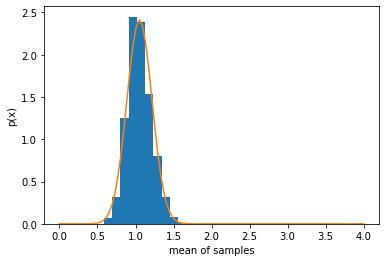

In [52]:
mu = sts.weibull_min.mean(c)
sigma = (sts.weibull_min.var(c)/50)**0.5

norm_rv = sts.norm(loc=mu, scale=sigma)

plt.hist(mean, density=True)
plt.ylabel('p(x)')
plt.xlabel('mean of samples')


x1 = np.linspace(0,4,100)
pdf1 = norm_rv.pdf(x1)
plt.plot(x1, pdf1)
plt.show()

### Размер выборки - 100 значений

In [53]:
mean=[]

for i in range(1000):
    t = sts.weibull_min.rvs(c, size=100)
    mean.append(t.mean())

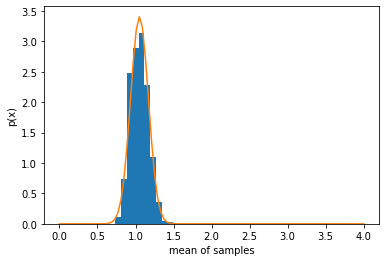

In [54]:
mu = sts.weibull_min.mean(c)
sigma = (sts.weibull_min.var(c)/100)**0.5

norm_rv = sts.norm(loc=mu, scale=sigma)

plt.hist(mean, density=True)
plt.ylabel('p(x)')
plt.xlabel('mean of samples')


x1 = np.linspace(0,4,100)
pdf1 = norm_rv.pdf(x1)
plt.plot(x1, pdf1)
plt.show()

## Выводы

##### 1. Распределение выборочных средних значений можно аппроксимировать нормальным распределением
##### 2. С увеличением размера выборки растет точность аппроксимации

